In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#dataSet = pd.read_csv('ex1data1.txt')
dataSet = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
dataSet.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


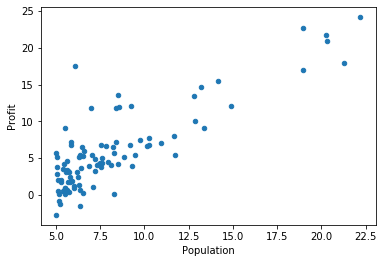

In [2]:
dataSet.plot(kind='scatter', x='Population', y='Profit')
plt.show()

In [3]:
# Cost function
def ComputeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    cost = np.sum(inner) / (2 * len(X))
    return cost

In [4]:
dataSet.insert(0, 'theta0', 1)
cols = dataSet.shape[1]
X = dataSet.iloc[:, :-1]
y = dataSet.iloc[:, cols-1:cols]

In [5]:
X.head()

,theta0,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [6]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [7]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [8]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = ComputeCost(X, y, theta)
        
    return theta, cost

In [9]:
alpha = 0.01
iters = 1500
theta, cost = gradientDescent(X, y, theta, alpha, iters)
theta, cost

(matrix([[-3.63029144,  1.16636235]]),
 array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
        4.48338826]))

In [10]:
predict1 = [1,3.5] * theta.T
predict1

matrix([[0.45197679]])

In [11]:
predict2 = [1,7] * theta.T
predict2

matrix([[4.53424501]])

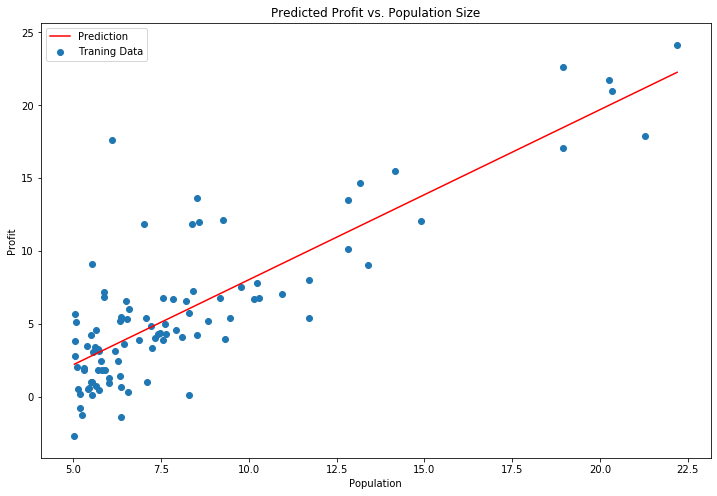

In [13]:
x = np.linspace(dataSet.Population.min(), dataSet.Population.max())
f = theta[0, 0] + (theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(dataSet.Population, dataSet.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [14]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y #X.T@X等价于X.T.dot(X)
    return theta

In [15]:
theta2 = normalEqn(X, y)
theta2

matrix([[-3.89578088],
        [ 1.19303364]])

In [ ]:
#梯度下降得到的结果是matrix([[-3.63029144,  1.16636235]])
#正规方程得到的结果是matrix([[-3.89578088], [1.19303364]])